#### 시계열 분석을 위한 기본학습

##### 기본용어

- 추세(Trend) : 시간에 따라 감소/증가하는 성향
- 계절성(Seasonality) : 계절에 따라 패턴을 가지는 성향
- 순환성(Cyclical) : 특정상황에서 발생하는 임시적인 성향(추세)
- 불규칙성(Irregular) : 지진,홍수,파업,코로나 같은 특수한 요인으로 발생하는 불규칙 패턴

##### 시계열 데이터 전처리방법

In [1]:
import pandas as pd
import numpy as np

In [2]:
# datetime 변환
df = pd.DataFrame({'date':['2019-01-03', '2021-11-24', '2023-07-11'], 'name':['JH', 'YS', 'OB']})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [3]:
# date 컬럼 datetime 형변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes


In [4]:
df.astype({'date':'datetime64[ns]'})

,date,name
0,2019-01-03,JH
1,2021-11-24,YS
2,2023-07-11,OB


In [5]:
# 날짜를 인덱스로 변경
df.set_index(keys=['date'], inplace=True)
df

,name
date,
2019-01-03,JH
2021-11-24,YS
2023-07-11,OB


In [6]:
# 날짜를 인덱스에서 해제(인덱스 초기화)
df.reset_index(inplace=True)
df

,date,name
0,2019-01-03,JH
1,2021-11-24,YS
2,2023-07-11,OB


In [7]:
# 결측치 확인 
# 결측치값 python None, numpy nan
df = pd.DataFrame({'date': ['2019-01-03', '2021-11-24', '2022-01-15', '2023-07-11'], 'x1':[0.1, 2.0, np.nan, 1.2]})
df

,date,x1
0,2019-01-03,0.1
1,2021-11-24,2.0
2,2022-01-15,NaN
3,2023-07-11,1.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4 non-null      object 
 1   x1      3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [9]:
df = df.astype({'date':'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
 1   x1      3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.0 bytes


In [10]:
# 날짜를 인덱스
df.set_index(keys=['date'], inplace=True)
df

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,NaN
2023-07-11,1.2


In [11]:
# 결측치 확인
df.isnull().sum()

x1    1
dtype: int64

In [12]:
# 결측치 제거, inplace=True 변경 결정 ffill 이전값으로 대체
df.fillna(method='ffill')

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,2.0
2023-07-11,1.2


In [13]:
# bfill 밑의 값으로 대체
df.fillna(method='bfill')

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,1.2
2023-07-11,1.2


In [14]:
# 결측치 전후의 값의 평균으로 채우기
df.interpolate()

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,1.6
2023-07-11,1.2


In [15]:
# 결측지 제거 -> 데이터수 변경
df.dropna()

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2023-07-11,1.2


In [16]:
# 빈도 설정
df.index

DatetimeIndex(['2019-01-03', '2021-11-24', '2022-01-15', '2023-07-11'], dtype='datetime64[ns]', name='date', freq=None)

In [17]:
# 'Y 매년 마지막날, 'M', 'D', 'W', 'SM', 'CBM', 'MS', 'Q', 'QS', 'H', 'T', 'S', 'N'
df.asfreq(freq='D', method='bfill')

,x1
date,
2019-01-03,0.1
2019-01-04,2.0
2019-01-05,2.0
2019-01-06,2.0
2019-01-07,2.0
...,...
2023-07-07,1.2
2023-07-08,1.2
2023-07-09,1.2


In [18]:
# rolling - 빈도범위를 다시 묶을때 특정값이 사라지는 경우 방지
df = pd.DataFrame({'date': ['2019-01-03', '2020-09-04', '2021-11-24', '2022-01-15', '2023-07-11'], 'x1':[5,4,3,2,7]})
df = df.astype({'date':'datetime64[ns]'})
df.set_index(keys=['date'], inplace=True)
df

,x1
date,
2019-01-03,5
2020-09-04,4
2021-11-24,3
2022-01-15,2
2023-07-11,7


In [19]:
# rolling(1) 현재자기값을 그대로 평균
df.rolling(1).mean()

,x1
date,
2019-01-03,5.0
2020-09-04,4.0
2021-11-24,3.0
2022-01-15,2.0
2023-07-11,7.0


In [20]:
# rolling(2) 현재값을 밑으로 밀면서 자기값과 합쳐서 평균
df.rolling(2).mean()

,x1
date,
2019-01-03,NaN
2020-09-04,4.5
2021-11-24,3.5
2022-01-15,2.5
2023-07-11,4.5


In [21]:
# 이전값과 차이 계산 diff
y_diff = df.diff()
y_diff.columns = ['diff']

In [22]:
pd.concat([df, y_diff], axis=1)

,x1,diff
date,,
2019-01-03,5,NaN
2020-09-04,4,-1.0
2021-11-24,3,-1.0
2022-01-15,2,-1.0
2023-07-11,7,5.0


In [23]:
# 데이터 밀기
df.shift(-1)

,x1
date,
2019-01-03,4.0
2020-09-04,3.0
2021-11-24,2.0
2022-01-15,7.0
2023-07-11,NaN


In [24]:
# 원-핫 인코딩 one-hot encoding
df_raw = pd.DataFrame({'color':['red','blue','green','blue','red']})

one_hot = pd.get_dummies(df_raw['color'])

In [25]:
one_hot

,blue,green,red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [26]:
# True/False 대신 1/0 표시
df_raw.pop('color').str.get_dummies()

,blue,green,red
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


##### Apple 주식 데이터 전처리

##### 주식관련 라이브러리 설치
- FinanceDataReader 모듈 설치

```python
!pip install finance-DataReader
```

In [27]:
!pip install finance-DataReader


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import FinanceDataReader as fdr  # 주식라이브러리 추가

import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [29]:
# 2022년 애플주식 데이터로드
# 미국주식은 주식코드, 우리나라 코드번호
df = fdr.DataReader('AAPL', '2016')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041485,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439020,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980326,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010452,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126835,283192000
...,...,...,...,...,...,...
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300


In [30]:
# KRX : 한국주식거래 전체 종목, KOSPI : 코스피 종목, KOSDAQ : 코스닥 종목, KONEX : 중소기업용 
# NASDAQ : 나스닥, NYSE : 뉴욕증권거래소, AMEX : 미국주식 섹터정보, SP500 : S&P 종목
# HKEX : 홍콩주식
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73300,2,-100,-0.14,73200,73500,72800,10060049,736819227400,437585060915000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,538000,2,-4000,-0.74,541000,542000,533000,248574,133670745000,125892000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,117200,2,-800,-0.68,116900,118700,116000,2427281,284032099050,85321877178000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,736000,2,-8000,-1.08,744000,744000,734000,44349,32670676000,52384064000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,60200,2,-100,-0.17,60100,60300,59800,809795,48623380900,49537779340000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1598,3,0,0.00,1598,1598,1598,1,1598,2524776080,1579960,KNX
2724,288490,KR7288490006,나라소프트,KONEX,일반기업부,58,2,-8,-12.12,65,68,57,534104,31447489,2212526000,38147000,KNX
2725,078650,KR7078650009,지나인제약,KOSDAQ,관리종목(소속부없음),370,2,-380,-50.67,560,571,370,3279466,1294352266,1509147490,4078777,KSQ
2726,322190,KR7322190000,베른,KONEX,일반기업부,140,1,9,6.87,150,150,140,71,10020,1249527580,8925197,KNX


In [31]:
df_nasdaq = fdr.StockListing('NASDAQ')
df_nasdaq

100%|██████████| 4239/4239 [00:10<00:00, 395.85it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,전화 및 소형 장치,57106020
1,MSFT,Microsoft Corp,소프트웨어,57201020
2,AMZN,Amazon.com Inc,백화점,53402010
3,NVDA,NVIDIA Corp,반도체,57101010
4,TSLA,Tesla Inc,자동차 및 트럭 제조,53101010
...,...,...,...,...
4234,OAKUR,Oak Woods Acquisition Rights Exp 3 March 2028,투자 지주 회사,55601010
4235,GODNR,Golden Star Acquisition Rights Exp 1 May 2028,투자 지주 회사,55601010
4236,PSNYW,Polestar Automotive Holding Uk Plc ADR,자동차 및 트럭 제조,53101010
4237,FXCOR,Financial Strategies Acquisition Rights Class A,투자 지주 회사,55601010


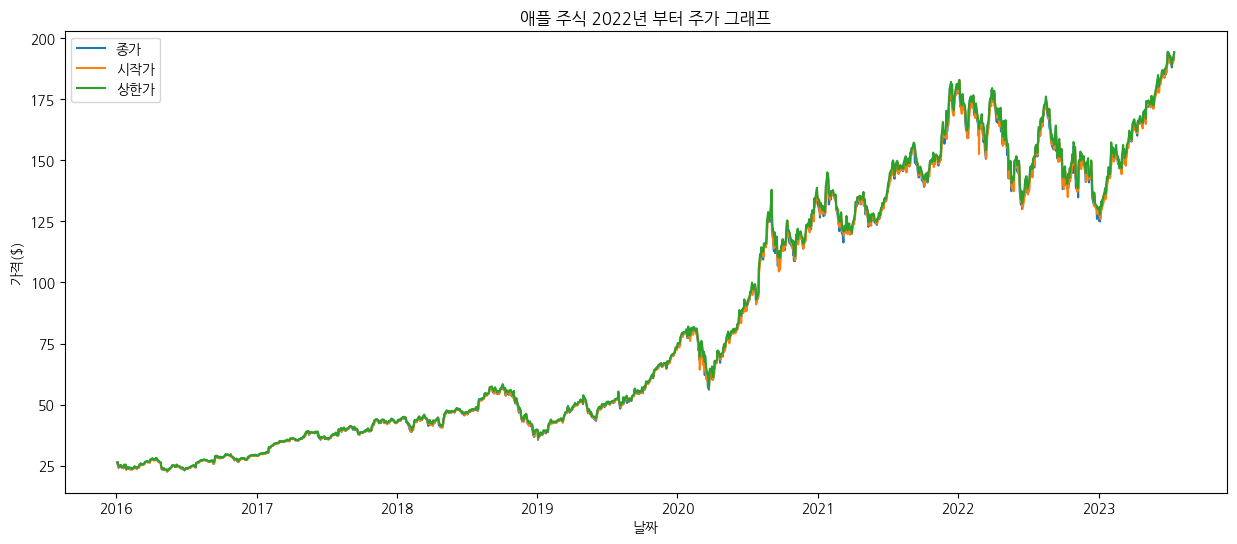

In [32]:
# 애플 주식 시각화
plt.figure(figsize=(15, 6))
plt.title('애플 주식 2022년 부터 주가 그래프')
plt.xlabel('날짜')
plt.ylabel('가격($)')

sns.lineplot(x=df.index, y=df['Close'], label='종가')
sns.lineplot(x=df.index, y=df['Open'], label='시작가')
sns.lineplot(x=df.index, y=df['High'], label='상한가')
plt.legend()
plt.show()

In [33]:
# 삼성전자
df_samsung = fdr.DataReader('005930', '2019')
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2023-07-11,70200,71500,70100,71500,12177392,0.028777
2023-07-12,71200,72000,71100,71900,10375581,0.005594
2023-07-13,72400,72600,71900,71900,14417279,0.000000


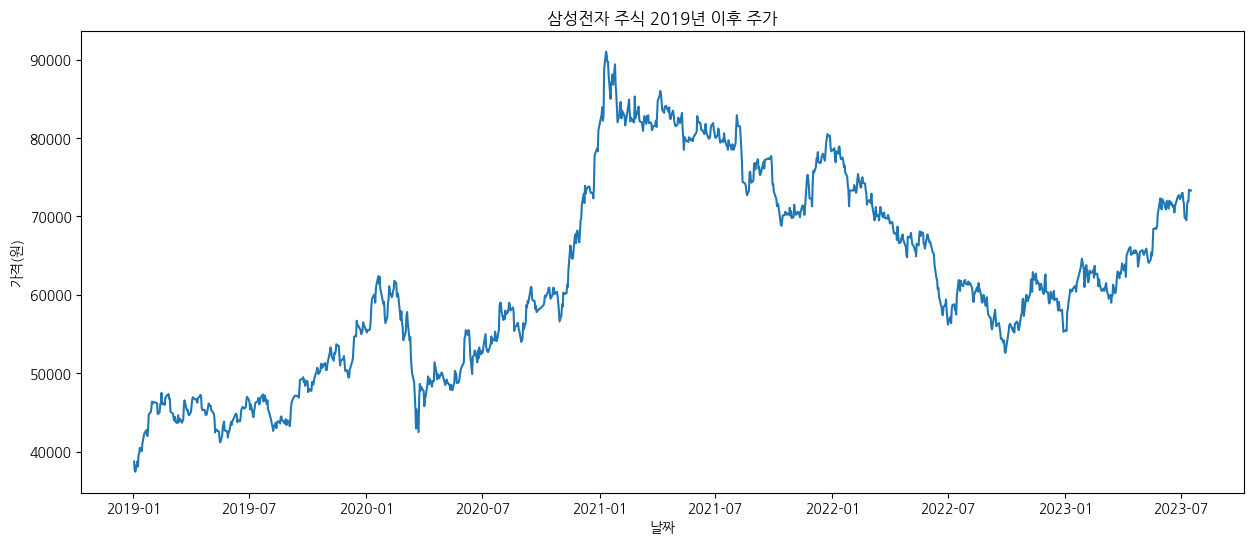

In [34]:
# 삼성전자 주식 시각화
plt.figure(figsize=(15, 6))
plt.title('삼성전자 주식 2019년 이후 주가')
plt.xlabel('날짜')
plt.ylabel('가격(원)')

sns.lineplot(x=df_samsung.index, y=df_samsung['Close'])
plt.show()

##### 시계열 데이터 전처리 추가

In [35]:
# 다운샘플링, BM = 주말, 공휴일을 제외한 매달 말일, Y, M, W, Q
# 업샘플링, 기준 날짜(D) --> H(시), T(분), S(초)
# 2023-07-31 오류
df_apple_mon = df.resample('BM').mean()
df_apple_mon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2016-01-29 to 2023-07-31
Freq: BM
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       91 non-null     float64
 1   High       91 non-null     float64
 2   Low        91 non-null     float64
 3   Close      91 non-null     float64
 4   Adj Close  91 non-null     float64
 5   Volume     91 non-null     float64
dtypes: float64(6)
memory usage: 5.0 KB


In [36]:
# 수익률 추가 = (매도가격-매수가격)/매도가격 
df_apple_mon['rtn'] = df_apple_mon['Close'].pct_change()
df_apple_mon

,Open,High,Low,Close,Adj Close,Volume,rtn
Date,,,,,,,
2016-01-29,24.676579,24.987368,24.232105,24.607237,22.462060,2.677575e+08,NaN
2016-02-29,23.924000,24.181875,23.677875,23.936625,21.950688,1.621725e+08,-0.027253
2016-03-31,25.954205,26.224318,25.807841,26.066818,23.923517,1.356454e+08,0.088993
2016-04-29,26.696429,26.939762,26.463810,26.684762,24.490650,1.661683e+08,0.023706
2016-05-31,23.739643,23.923690,23.512262,23.743690,21.905253,1.715565e+08,-0.110215
...,...,...,...,...,...,...,...
2023-03-31,154.455218,156.363044,153.241304,154.964782,154.750734,6.609855e+07,0.026472
2023-04-28,164.437370,165.925790,163.552632,165.045790,164.817817,5.103735e+07,0.065054
2023-05-31,172.510456,173.752728,171.444545,172.622728,172.526194,5.796161e+07,0.045908


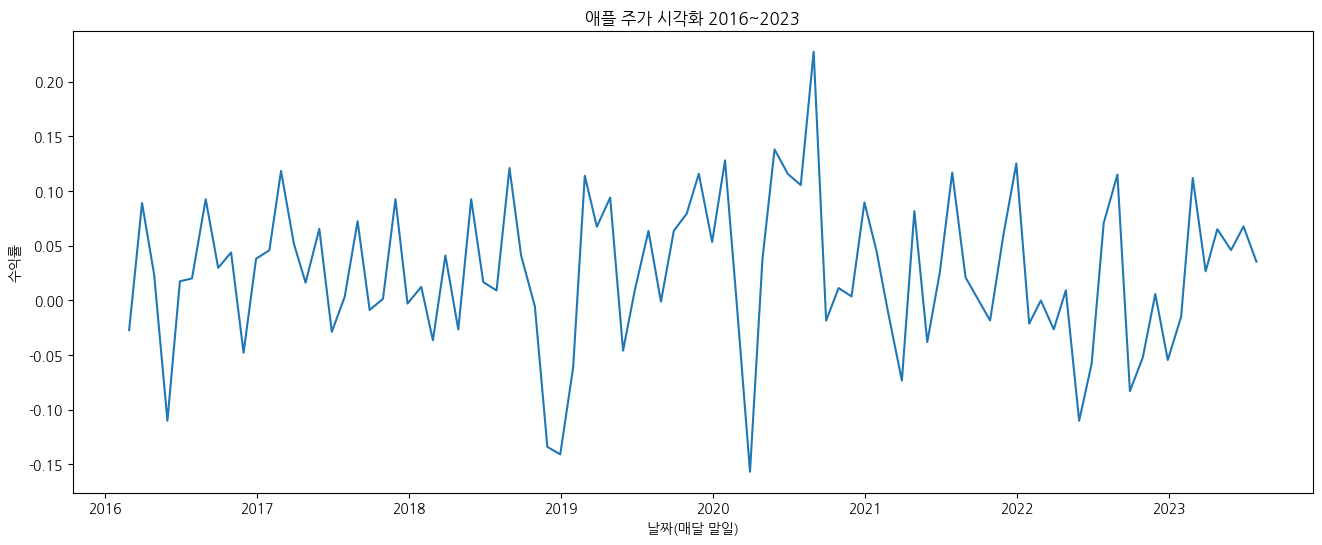

In [37]:
# 수익률 시각화
plt.figure(figsize=(16, 6))
plt.title('애플 주가 시각화 2016~2023')
plt.xlabel('날짜(매달 말일)')
plt.ylabel('수익률')

sns.lineplot(x=df_apple_mon.index, y=df_apple_mon['rtn'])
plt.show()

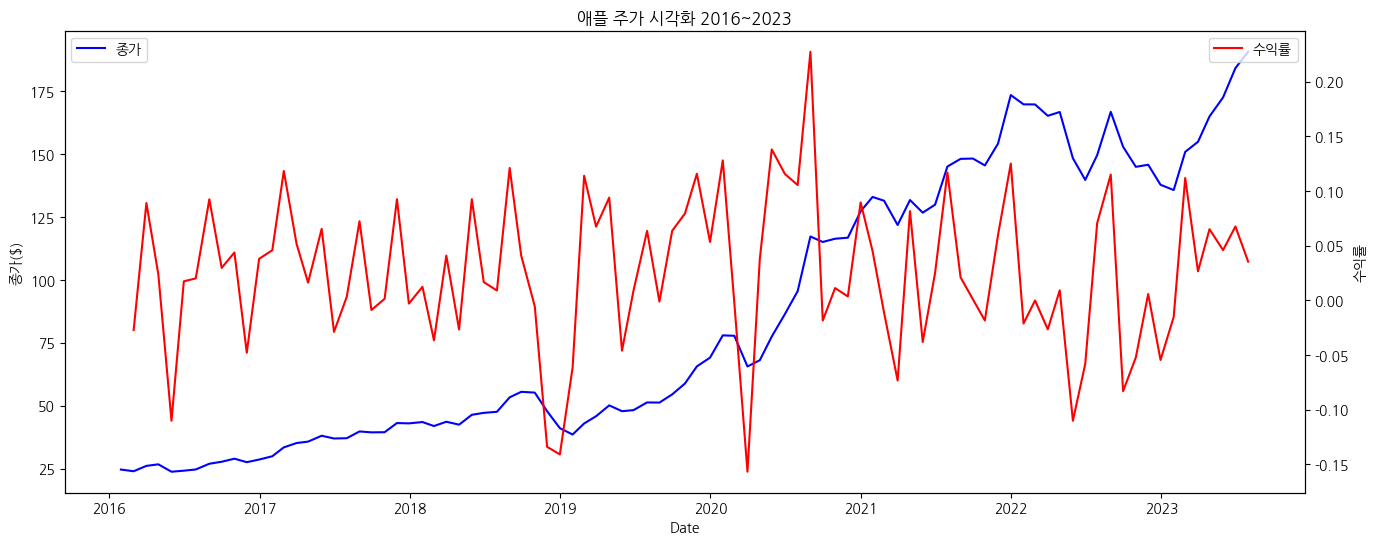

In [38]:
# 종가/수익률 시각화(다중 차트)
# plt.figure(figsize=(20, 6))
fig, axe1 = plt.subplots()
fig.set_figheight(6) # subplot일때는 figsize 조정함수 사용할 것
fig.set_figwidth(16)

axe2 = axe1.twinx()
plt.title('애플 주가 시각화 2016~2023')
plt.xlabel('날짜(매달 말일)')
# 서브플롯의 label 입력
c1 = sns.lineplot(ax=axe1, data=df_apple_mon, x=df_apple_mon.index, y='Close', color='blue', label='종가')
c2 = sns.lineplot(ax=axe2, data=df_apple_mon, x=df_apple_mon.index, y='rtn', color='red', label='수익률')

axe1.set_ylabel('종가($)')
axe2.set_ylabel('수익률')
plt.legend() # 범례를 표시
plt.show()

In [39]:
df_apple_mon

,Open,High,Low,Close,Adj Close,Volume,rtn
Date,,,,,,,
2016-01-29,24.676579,24.987368,24.232105,24.607237,22.462060,2.677575e+08,NaN
2016-02-29,23.924000,24.181875,23.677875,23.936625,21.950688,1.621725e+08,-0.027253
2016-03-31,25.954205,26.224318,25.807841,26.066818,23.923517,1.356454e+08,0.088993
2016-04-29,26.696429,26.939762,26.463810,26.684762,24.490650,1.661683e+08,0.023706
2016-05-31,23.739643,23.923690,23.512262,23.743690,21.905253,1.715565e+08,-0.110215
...,...,...,...,...,...,...,...
2023-03-31,154.455218,156.363044,153.241304,154.964782,154.750734,6.609855e+07,0.026472
2023-04-28,164.437370,165.925790,163.552632,165.045790,164.817817,5.103735e+07,0.065054
2023-05-31,172.510456,173.752728,171.444545,172.622728,172.526194,5.796161e+07,0.045908


In [40]:
# 5일 이동평균선 - 최근 5일간의 종가기준 합산 뒤 5로 나는 평균
# 60일 이동평균선 - 이전 2달동안 종가 기준 평균
df_apple_mon['ma60'] = df_apple_mon['Close'].rolling(2).mean()
df_apple_mon

,Open,High,Low,Close,Adj Close,Volume,rtn,ma60
Date,,,,,,,,
2016-01-29,24.676579,24.987368,24.232105,24.607237,22.462060,2.677575e+08,NaN,NaN
2016-02-29,23.924000,24.181875,23.677875,23.936625,21.950688,1.621725e+08,-0.027253,24.271931
2016-03-31,25.954205,26.224318,25.807841,26.066818,23.923517,1.356454e+08,0.088993,25.001722
2016-04-29,26.696429,26.939762,26.463810,26.684762,24.490650,1.661683e+08,0.023706,26.375790
2016-05-31,23.739643,23.923690,23.512262,23.743690,21.905253,1.715565e+08,-0.110215,25.214226
...,...,...,...,...,...,...,...,...
2023-03-31,154.455218,156.363044,153.241304,154.964782,154.750734,6.609855e+07,0.026472,152.966601
2023-04-28,164.437370,165.925790,163.552632,165.045790,164.817817,5.103735e+07,0.065054,160.005286
2023-05-31,172.510456,173.752728,171.444545,172.622728,172.526194,5.796161e+07,0.045908,168.834259


In [41]:
# 5일 이동평균 값
df['ma5'] = df['Close'].rolling(5).mean()
df

,Open,High,Low,Close,Adj Close,Volume,ma5
Date,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041485,270597600,NaN
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439020,223164000,NaN
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980326,273829600,NaN
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010452,324377600,NaN
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126835,283192000,25.108500
...,...,...,...,...,...,...,...
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100,190.101999
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200,189.790000
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300,189.535999


In [42]:
# 20일 이동평균값, 60일 경우는 rolling(60)
df['ma20'] = df['Close'].rolling(20).mean()
df

,Open,High,Low,Close,Adj Close,Volume,ma5,ma20
Date,,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041485,270597600,NaN,NaN
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439020,223164000,NaN,NaN
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980326,273829600,NaN,NaN
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010452,324377600,NaN,NaN
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126835,283192000,25.108500,NaN
...,...,...,...,...,...,...,...,...
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100,190.101999,187.686999
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200,189.790000,187.985999
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300,189.535999,188.347499


##### 이동평균선 차트

- 데이터 일차트, 월차트, 5일, 20일, 60일 이동평균값

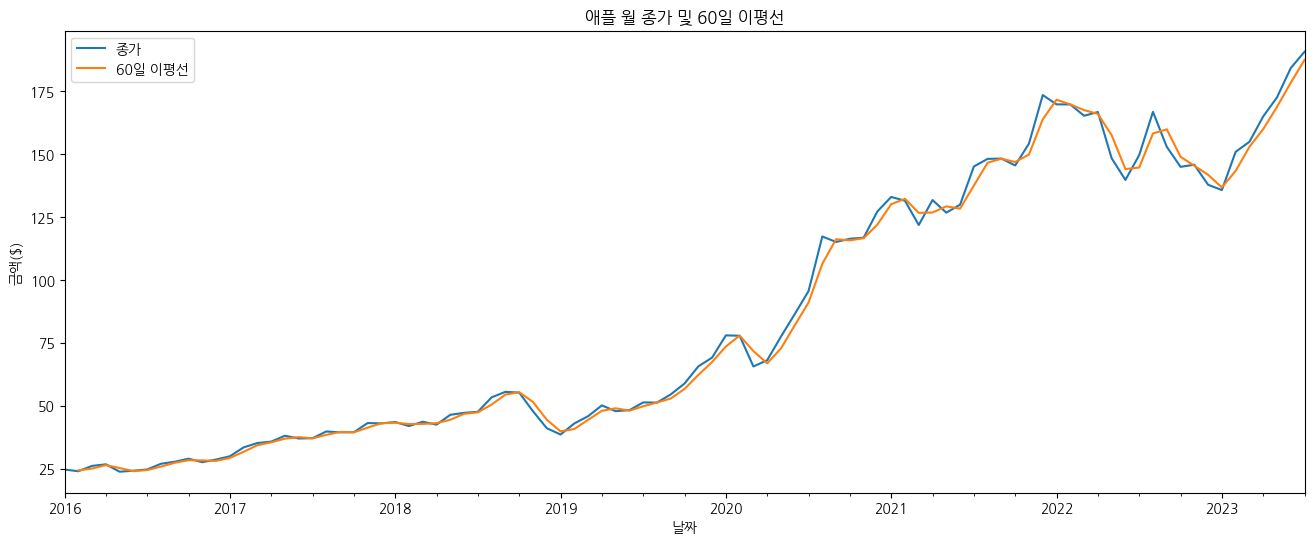

In [43]:
# 데이터프레임 하나만 가지고 라인차트 그리기
df_apple_mon.iloc[:,[3,7]].plot(figsize=(16, 6))
plt.title('애플 월 종가 및 60일 이평선')
plt.xlabel('날짜')
plt.ylabel('금액($)')
plt.legend(['종가', '60일 이평선'])
plt.show()

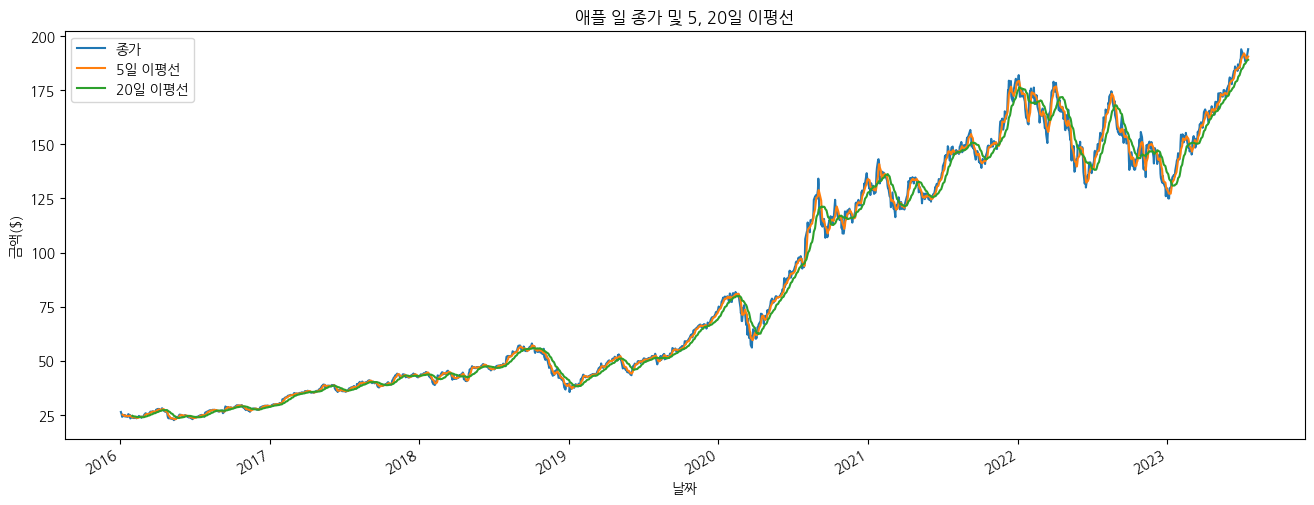

In [44]:
df.iloc[:,[3,6,7]].plot(figsize=(16,6))
plt.title('애플 일 종가 및 5, 20일 이평선')
plt.xlabel('날짜')
plt.ylabel('금액($)')
plt.legend(['종가', '5일 이평선', '20일 이평선'])
plt.show()

In [45]:
# 두차트 합치기
df_apple_ma = df.resample('BM').mean()
df_apple_ma

,Open,High,Low,Close,Adj Close,Volume,ma5,ma20
Date,,,,,,,,
2016-01-29,24.676579,24.987368,24.232105,24.607237,22.462060,2.677575e+08,24.549700,NaN
2016-02-29,23.924000,24.181875,23.677875,23.936625,21.950688,1.621725e+08,23.915000,24.121725
2016-03-31,25.954205,26.224318,25.807841,26.066818,23.923517,1.356454e+08,25.798455,24.983290
2016-04-29,26.696429,26.939762,26.463810,26.684762,24.490650,1.661683e+08,26.984167,26.917381
2016-05-31,23.739643,23.923690,23.512262,23.743690,21.905253,1.715565e+08,23.644905,24.600667
...,...,...,...,...,...,...,...,...
2023-03-31,154.455218,156.363044,153.241304,154.964782,154.750734,6.609855e+07,153.663478,151.662478
2023-04-28,164.437370,165.925790,163.552632,165.045790,164.817817,5.103735e+07,164.526106,161.448447
2023-05-31,172.510456,173.752728,171.444545,172.622728,172.526194,5.796161e+07,171.809000,168.972546


In [46]:
df_apple_ma[['Close','ma5','ma20']]

,Close,ma5,ma20
Date,,,
2016-01-29,24.607237,24.549700,NaN
2016-02-29,23.936625,23.915000,24.121725
2016-03-31,26.066818,25.798455,24.983290
2016-04-29,26.684762,26.984167,26.917381
2016-05-31,23.743690,23.644905,24.600667
...,...,...,...
2023-03-31,154.964782,153.663478,151.662478
2023-04-28,165.045790,164.526106,161.448447
2023-05-31,172.622728,171.809000,168.972546


In [47]:
df_apple_mon[['Close','ma60']]

,Close,ma60
Date,,
2016-01-29,24.607237,NaN
2016-02-29,23.936625,24.271931
2016-03-31,26.066818,25.001722
2016-04-29,26.684762,26.375790
2016-05-31,23.743690,25.214226
...,...,...
2023-03-31,154.964782,152.966601
2023-04-28,165.045790,160.005286
2023-05-31,172.622728,168.834259


In [48]:
# 5, 20일 이평션 DF, 60일 이평선 DF 합치기
df_apple_total = pd.concat([df_apple_ma[['Close','ma5','ma20']], df_apple_mon[['ma60']]], axis=1)
df_apple_total

,Close,ma5,ma20,ma60
Date,,,,
2016-01-29,24.607237,24.549700,NaN,NaN
2016-02-29,23.936625,23.915000,24.121725,24.271931
2016-03-31,26.066818,25.798455,24.983290,25.001722
2016-04-29,26.684762,26.984167,26.917381,26.375790
2016-05-31,23.743690,23.644905,24.600667,25.214226
...,...,...,...,...
2023-03-31,154.964782,153.663478,151.662478,152.966601
2023-04-28,165.045790,164.526106,161.448447,160.005286
2023-05-31,172.622728,171.809000,168.972546,168.834259


In [49]:
df_apple_total.to_csv('./apple_total.csv', encoding='utf-8')

In [50]:
df_apple_total.loc['2019-06-28':]

,Close,ma5,ma20,ma60
Date,,,,
2019-06-28,48.242250,47.697500,46.638719,48.030330
2019-07-31,51.304091,51.032432,50.174961,49.773171
2019-08-30,51.239432,51.303954,51.266790,51.271761
2019-09-30,54.498750,54.158900,52.953700,52.869091
2019-10-31,58.821630,58.284022,56.585217,56.660190
2019-11-29,65.630126,65.112576,62.923244,62.225878
2019-12-31,69.131428,68.533333,67.026393,67.380777
2020-01-31,77.979048,77.366310,74.241886,73.555238
2020-02-28,77.817631,78.840368,79.239980,77.898339


<Axes: xlabel='Date'>

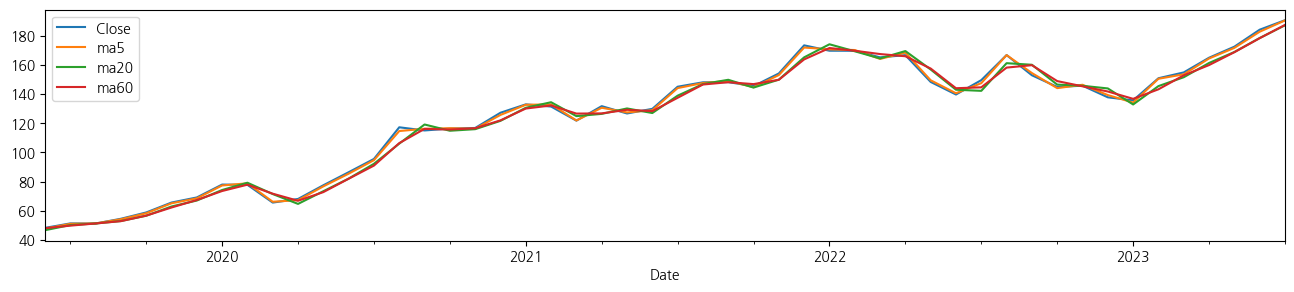

In [51]:
# 시각화
df_apple_total.loc['2019-06-28':].plot(figsize=(16,3))

In [52]:
# 상승/하락장 판별
last_close = df_apple_total['ma60'].iloc[-2]
price = df_apple_total['Close'].iloc[-1]
print(f'60일전 종가 : ${last_close:.2f}, 전일 종가 : ${price:.2f}')

if price >= last_close:
    print('상승장')
else:
    print('하락장')

60일전 종가 : $178.45, 전일 종가 : $190.80
상승장


In [53]:
# 파일 저장
df_excel = df_apple_total.reset_index()
df_excel = df_excel.astype({'Date':'string'}) # 날짜는 문자열로 형변환 후
df_excel.to_excel('./apple_total.xlsx', index=False)

##### statsmodels 모듈
- 머신러닝 탑재된 시세예측 라이브러리

```python 
!pip install statsmodels
```

In [54]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [56]:
df = pd.read_csv('./apple_total.csv', encoding='utf-8')
df

,Date,Close,ma5,ma20,ma60
0,2016-01-29,24.607237,24.549700,NaN,NaN
1,2016-02-29,23.936625,23.915000,24.121725,24.271931
2,2016-03-31,26.066818,25.798455,24.983290,25.001722
3,2016-04-29,26.684762,26.984167,26.917381,26.375790
4,2016-05-31,23.743690,23.644905,24.600667,25.214226
...,...,...,...,...,...
86,2023-03-31,154.964782,153.663478,151.662478,152.966601
87,2023-04-28,165.045790,164.526106,161.448447,160.005286
88,2023-05-31,172.622728,171.809000,168.972546,168.834259
89,2023-06-30,184.283333,182.888476,178.573572,178.453030


In [57]:
ts = df.loc[:, ['Close']]
ts.index = df['Date']
ts

,Close
Date,
2016-01-29,24.607237
2016-02-29,23.936625
2016-03-31,26.066818
2016-04-29,26.684762
2016-05-31,23.743690
...,...
2023-03-31,154.964782
2023-04-28,165.045790
2023-05-31,172.622728


In [58]:
# fig = plt.figure(figsize=(16, 6))
# axes1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(ts, lags=50, ax=axes1)

In [59]:
# ARIMA 모델만들기
model = ARIMA(df_apple_total['Close'].values, order=(0,1,2))
model_fit = model.fit()

In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -297.334
Date:                Tue, 18 Jul 2023   AIC                            600.668
Time:                        08:24:29   BIC                            608.168
Sample:                             0   HQIC                           603.693
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2562      0.090      2.834      0.005       0.079       0.433
ma.L2         -0.0268      0.086     -0.311      0.756      -0.196       0.142
sigma2        43.3250      4.982      8.697      0.000      33.561      53.089
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                10.16
Prob(Q):                              0.63   Prob(JB):                         0.01
Heteroskedasticity (H):              25.30   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

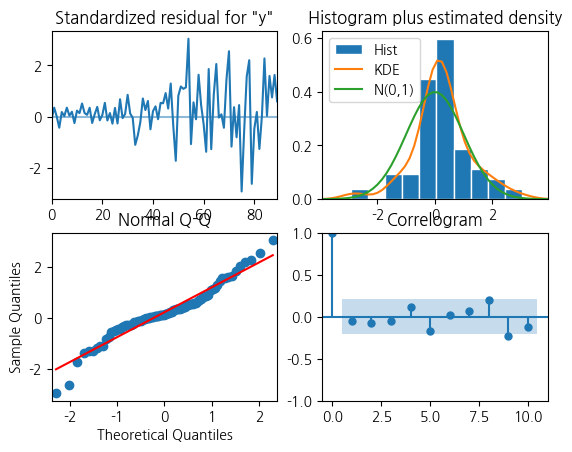

In [61]:
fig = model_fit.plot_diagnostics()

In [62]:
# 다음번에 예측결과 보도
predict_price = model_fit.forecast()
predict_price

array([191.51049826])

In [63]:
df_predict = pd.DataFrame(model_fit.predict())
df_predict.columns = ['predict']
df_predict

,predict
0,0.000000
1,24.607502
2,23.779723
3,26.663653
4,26.629309
...,...
86,154.796066
87,154.607107
88,167.715912
89,173.599980


In [64]:
model_fit.predict(steps=5)

array([  0.        ,  24.60750246,  23.7797231 ,  26.66365299,
        26.62930869,  23.00385463,  24.52805393,  24.6366923 ,
        27.49741797,  27.70870683,  29.23307053,  27.0717265 ,
        29.01684321,  30.07630303,  34.26399341,  35.29269847,
        35.80774903,  38.62172014,  36.47118417,  37.27418505,
        40.37486328,  39.08633441,  39.57469619,  43.99534347,
        42.61629355,  43.75549773,  41.41306891,  44.24006375,
        41.94280492,  47.56998477,  46.92998858,  47.75497853,
        54.74927315,  55.56578341,  55.09998381,  45.95028614,
        40.01082019,  38.29607863,  44.15921345,  46.12552375,
        51.11020957,  46.86758311,  48.6827688 ,  51.93886581,
        50.98990846,  55.41656193,  59.59997553,  67.08386508,
        69.49431782,  80.098123  ,  77.00572803,  62.75258858,
        69.77143874,  79.33235444,  88.06850884,  97.29639737,
       122.22400499, 112.76981109, 117.53711259, 116.54606919,
       130.06250465, 133.51074615, 130.94468735, 119.59

In [65]:
df_temp = df_apple_total[['Close']]
df_temp

,Close
Date,
2016-01-29,24.607237
2016-02-29,23.936625
2016-03-31,26.066818
2016-04-29,26.684762
2016-05-31,23.743690
...,...
2023-03-31,154.964782
2023-04-28,165.045790
2023-05-31,172.622728


##### 실제 주가통계자료, 예측자료 통합

In [66]:
# pd.concat([df_apple_ma[['Close','ma5','ma20']], df_apple_mon[['ma60']]], axis=1)
# 판다스로 두 DF 합치기
df_apple_last = pd.concat([df_temp.reset_index(), df_predict], axis=1)
df_apple_last

,Date,Close,predict
0,2016-01-29,24.607237,0.000000
1,2016-02-29,23.936625,24.607502
2,2016-03-31,26.066818,23.779723
3,2016-04-29,26.684762,26.663653
4,2016-05-31,23.743690,26.629309
...,...,...,...
86,2023-03-31,154.964782,154.796066
87,2023-04-28,165.045790,154.607107
88,2023-05-31,172.622728,167.715912
89,2023-06-30,184.283333,173.599980


In [67]:
df_apple_last.set_index(keys=['Date'], inplace=True)
df_apple_last

,Close,predict
Date,,
2016-01-29,24.607237,0.000000
2016-02-29,23.936625,24.607502
2016-03-31,26.066818,23.779723
2016-04-29,26.684762,26.663653
2016-05-31,23.743690,26.629309
...,...,...
2023-03-31,154.964782,154.796066
2023-04-28,165.045790,154.607107
2023-05-31,172.622728,167.715912


<Axes: xlabel='Date'>

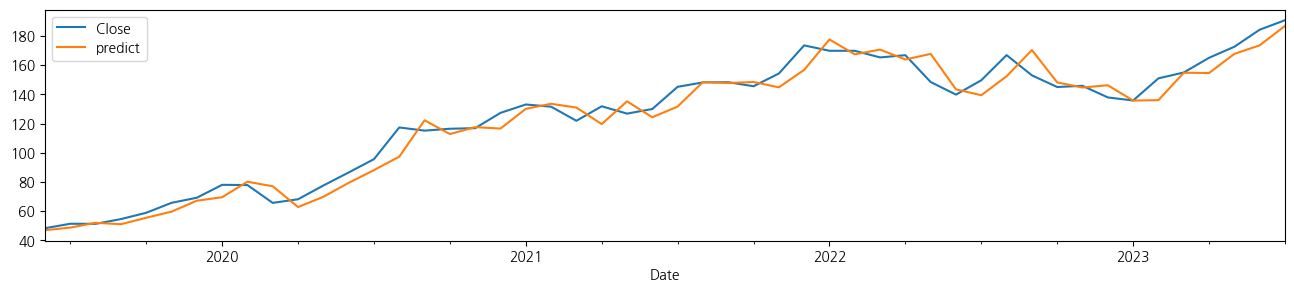

In [68]:
df_apple_last.loc['2019-06-28':].plot(figsize=(16,3))

In [69]:
df_apple_last

,Close,predict
Date,,
2016-01-29,24.607237,0.000000
2016-02-29,23.936625,24.607502
2016-03-31,26.066818,23.779723
2016-04-29,26.684762,26.663653
2016-05-31,23.743690,26.629309
...,...,...
2023-03-31,154.964782,154.796066
2023-04-28,165.045790,154.607107
2023-05-31,172.622728,167.715912


In [70]:
# 예측되는 애플 예측주가
predict_price[0]

191.5104982633818